In [37]:
import pandas as pd
file_path = "/content/Covid.xlsx"
df = pd.read_excel(file_path)

print(df.head())

print(df.info())


  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), obje

In [38]:
missing_values = df.isnull().sum()
print(missing_values)

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64


In [39]:
print(df.describe())

                HDI            TC            TD           STI           POP  \
count  44216.000000  50418.000000  50418.000000  50418.000000  50418.000000   
mean       0.720139      6.762125      3.413681      3.178897     15.442097   
std        0.160902      3.637347      3.082761      1.673451      2.495039   
min        0.000000      0.000000      0.000000      0.000000      6.695799   
25%        0.601000      4.158883      0.000000      2.867331     14.151619   
50%        0.752000      7.092574      3.178054      4.000583     15.929201   
75%        0.847000      9.504669      5.620401      4.335852     17.187513   
max        0.953000     15.914092     12.299900      4.605170     21.087439   

             GDPCAP  
count  50418.000000  
mean       8.318580  
std        3.177130  
min        0.000000  
25%        7.955479  
50%        9.368531  
75%       10.237704  
max       11.669379  


**HISTOGRAM**

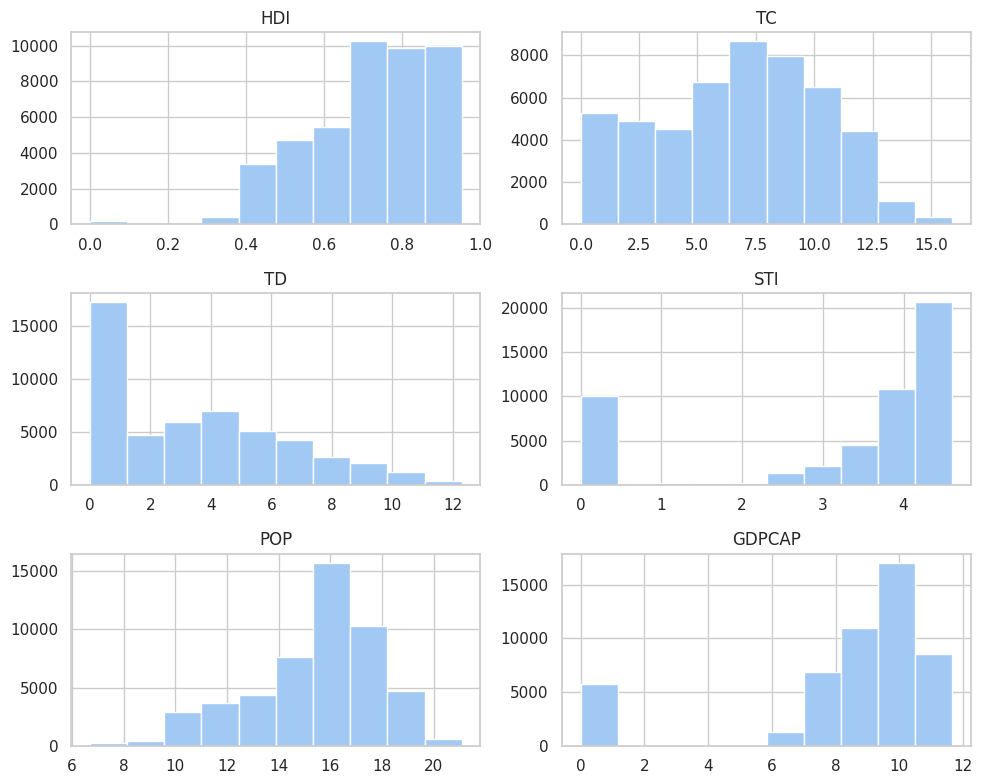

In [40]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**HDI (Human Development Index)**:
   - The data is skewed toward higher HDI values, with a significant number of countries having an HDI between 0.6 and 0.9.
   - This indicates that most countries in the dataset have moderate to high levels of human development.
   
**TC (Total Cases)**:
   - The histogram appears normally distributed with a peak around the 8-10 range.
   - This suggests that most countries fall within a similar range of total reported COVID-19 cases (likely measured in thousands or millions).

**TD (Total Deaths)**:
   - The distribution is right-skewed, indicating that the majority of countries have relatively low COVID-19 death counts, with fewer countries experiencing higher death tolls.

**STI (Stringency Index)**:
   - This data shows a heavy concentration toward the higher values, with a large number of countries implementing strict lockdowns (index values between 3.5 and 4.5).
   - This suggests that many countries adopted stringent measures to control the pandemic.

**Each graph helps in visually understanding the spread of the values within each variable, providing insights into how countries responded to the pandemic (Stringency Index), their development level (HDI), and the impact of the virus (total cases and deaths).**

**INTERACTIVE BAR PLOT**

In [41]:
import plotly.express as px

df_sorted = df.sort_values(by='HDI', ascending=False)

fig = px.bar(df_sorted,
             x='COUNTRY',
             y='HDI',
             title='Countries and their Human Development Index',
             labels={'COUNTRY':'Country', 'HDI':'Human Development Index'},
             hover_data=['HDI'],
             template='plotly_white',
             color='HDI',
             color_continuous_scale='Bluered')
fig.update_layout(xaxis_title='Country',
                  yaxis_title='Human Development Index',
                  xaxis_tickangle=-45)
fig.show()


 - The color scheme, transitioning from blue (lower HDI) to red (higher HDI), visually represents the level of development across different countries. Countries with the highest HDI are in the dark red, while those with lower HDI appear in lighter or blue shades.
 - The graph shows a descending pattern, with countries having the highest HDI listed on the left, gradually declining as we move to the right. There is a notable drop-off in HDI after the initial few countries.

**This graph provides a clear visualization of how human development varies significantly across countries, with a small group of highly developed nations, many moderately developed ones, and a significant number of countries facing challenges in terms of human development.**

In [42]:
# Check the data types of the columns
print(df.dtypes)

# Check for non-numeric values in numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


CODE        object
COUNTRY     object
DATE        object
HDI        float64
TC         float64
TD         float64
STI        float64
POP        float64
GDPCAP     float64
dtype: object
Non-numeric columns: Index(['CODE', 'COUNTRY', 'DATE'], dtype='object')


**CORRELATION MATRIX**

In [43]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


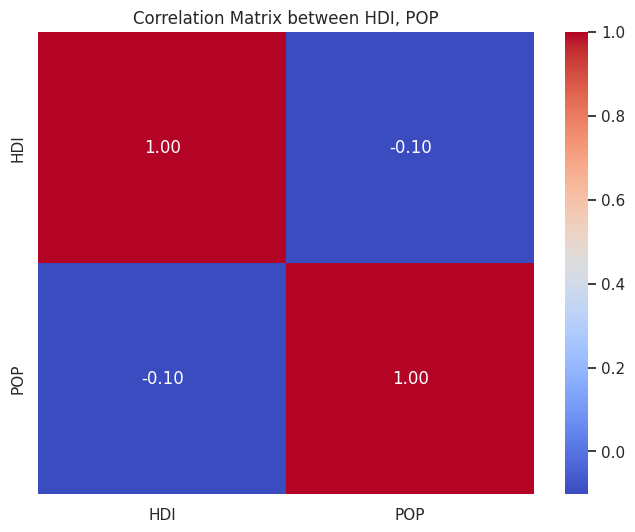

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.columns)

if 'HDI' in df.columns:
    df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')

df = df.dropna(subset=['HDI', 'POP'])

correlation_matrix = df[['HDI', 'POP']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between HDI, POP')
plt.show()


- The blue represents the negative correlation between HDI and Population, while the red represents the perfect correlations along the diagonal (HDI-HD and POP-POP).

**The weak negative correlation between HDI and Population suggests that countries with higher populations tend to have slightly lower human development, but the effect is minimal. There may be other factors influencing HDI more strongly than population size.**

**PIE CHART**

Top 10 Countries by Population:
           COUNTRY          POP
35           China  6199.707136
76           India  6187.333639
174  United States  5767.585258
77       Indonesia  5711.508171
125       Pakistan  5648.676670
23          Brazil  5637.371231
122        Nigeria  5628.354847
136         Russia  5526.808443
109         Mexico  5490.391650
84           Japan  5484.736623


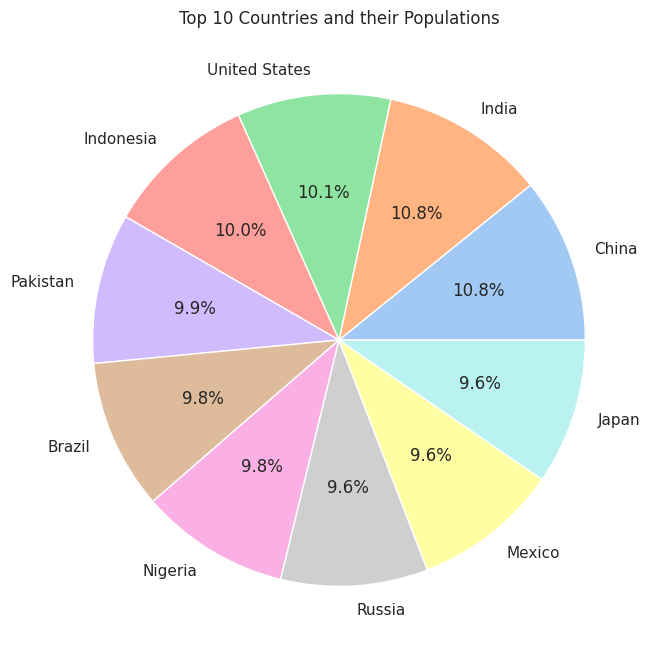

In [45]:
if 'COUNTRY' in df.columns and 'POP' in df.columns:
    country_population = df.groupby('COUNTRY')['POP'].sum().reset_index()

    top_10_countries = country_population.nlargest(10, 'POP')

    print("Top 10 Countries by Population:")
    print(top_10_countries)

    plt.figure(figsize=(8, 8))
    plt.pie(top_10_countries['POP'], labels=top_10_countries['COUNTRY'], autopct='%1.1f%%')
    plt.title('Top 10 Countries and their Populations')
    plt.ylabel('')
    plt.show()
else:
    print("Columns 'COUNTRY' or 'POP' not found in the DataFrame.")


- **Balanced Distribution**: The pie chart indicates a relatively balanced distribution of the metric across these major countries. No country overwhelmingly dominates, and there is a small spread (from 9.6% to 10.1%) between the smallest and largest shares.
- **Global Representation**: The chart includes major global economies from diverse regions (North America, South America, Asia, Africa, and Europe). This suggests the data likely relates to a global phenomenon like population, GDP, energy use, or international trade where these countries are key players.
- **Subtle Differences**: While all countries hold significant shares, the slight differences between them might reflect nuanced global dynamics, such as emerging economies catching up to traditionally dominant ones (e.g., India and China having larger shares than Japan or Russia).

**If this pie chart represents population, for example, it showcases that these countries, which have some of the highest populations globally, are closely distributed in terms of global population share. Similarly, if it represents economic metrics, it shows the strong economic influence of these nations globally.**

**BOX PLOT**

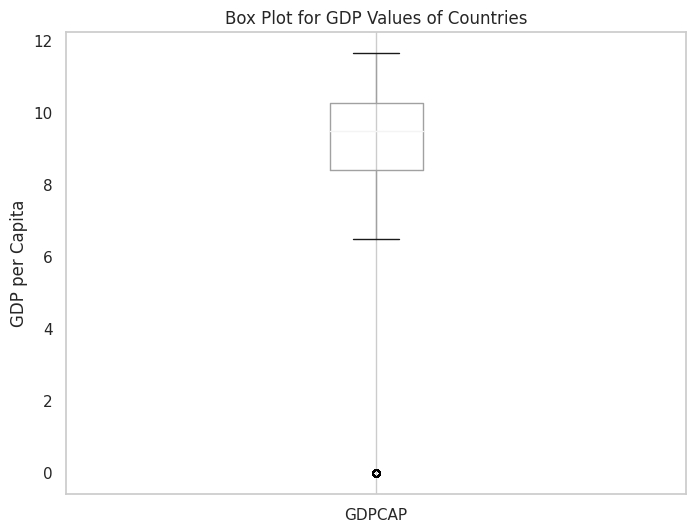

In [46]:
if 'GDPCAP' in df.columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column='GDPCAP', flierprops=dict(marker='o', color='red', markersize=5))  # Customize outlier appearance
    plt.title('Box Plot for GDP Values of Countries')
    plt.ylabel('GDP per Capita')
    plt.grid(axis='y')
    plt.show()
else:
    print("Column 'GDPCAP' not found in the DataFrame.")

- The central box represents the interquartile range (IQR), which contains the middle 50% of the GDP per capita values.
- The lower and upper bounds of the box indicate the 25th percentile (Q1) and 75th percentile (Q3), respectively.

This box plot allows for quick visual insights into the overall distribution of GDP per capita across countries and highlights any anomalies like the low outlier.

**HISTOGRAM**

Available columns in the dataset:
Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


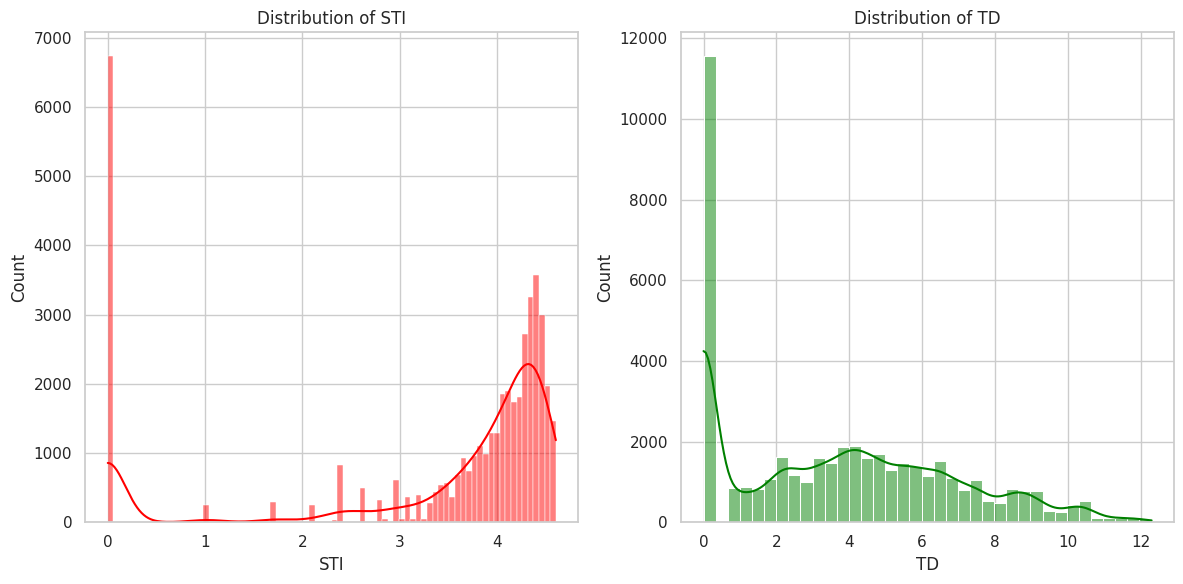

In [47]:
print("Available columns in the dataset:")
print(df.columns)

if 'TD' in df.columns and 'STI' in df.columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['STI'], kde=True, color='red')
    plt.title('Distribution of STI')

    plt.subplot(1, 2, 2)
    sns.histplot(df['TD'], kde=True, color='green')
    plt.title('Distribution of TD')

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'STI' or 'TD' not found in the DataFrame.")


- Both graphs highlight considerable variability in both stringency measures and total deaths across countries. Countries with either very lenient or strict restrictions seem to dominate, and there is a large disparity in total deaths, with most countries having fewer deaths but a few facing severe outbreaks.

**LINE PLOT**

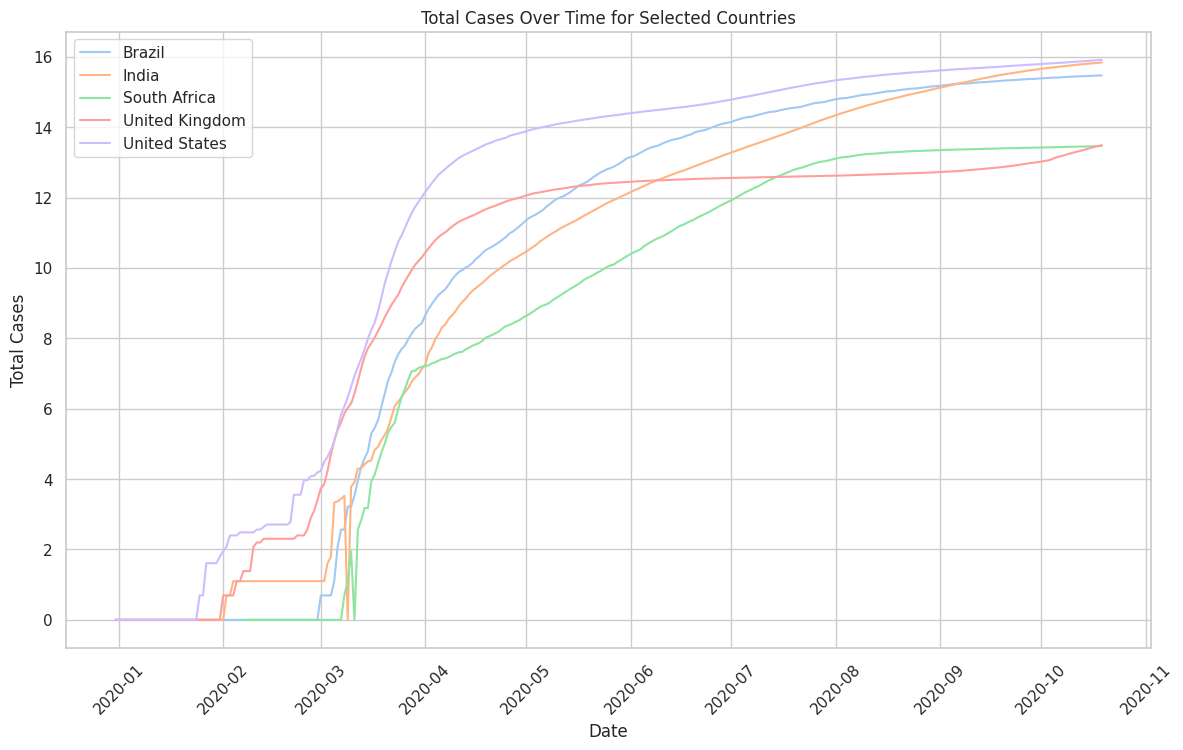

In [48]:
df['DATE'] = pd.to_datetime(df['DATE'])

sns.set(style="whitegrid", palette="pastel")

#Total Cases and Total Deaths Over Time for Selected Countries
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'South Africa']
covid_selected = df[df['COUNTRY'].isin(countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=covid_selected, x='DATE', y='TC', hue='COUNTRY')
plt.title("Total Cases Over Time for Selected Countries")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


- Over the span of years, the United States accumulated the highest values (likely related to the pandemic's impact), followed closely by Brazil and the United Kingdom. India and South Africa show slower, more gradual cumulative increases. The graph reflects how different countries managed and were impacted by the pandemic across multiple years, with some seeing rapid surges earlier and others facing delayed but significant growth later.

**BOX PLOT**

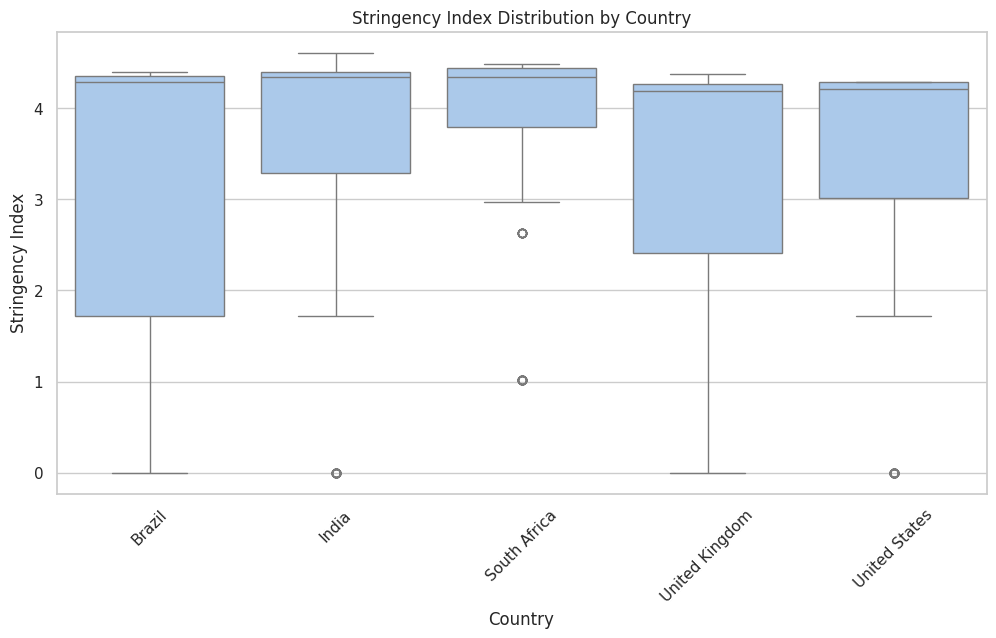

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=covid_selected, x='COUNTRY', y='STI')
plt.title("Stringency Index Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Stringency Index")
plt.xticks(rotation=45)
plt.show()


- Brazil, India, and the UK show consistently higher median stringency values, indicating stricter government measures during most periods of the pandemic.
- South Africa and the United States display more variability, reflecting changes in government responses over time.
- Outliers in several countries suggest periods of either exceptionally strict or lenient measures.

**This distribution provides insight into how different countries approached COVID-19 restrictions, balancing between public health measures and other considerations.**

**PAIR PLOT**

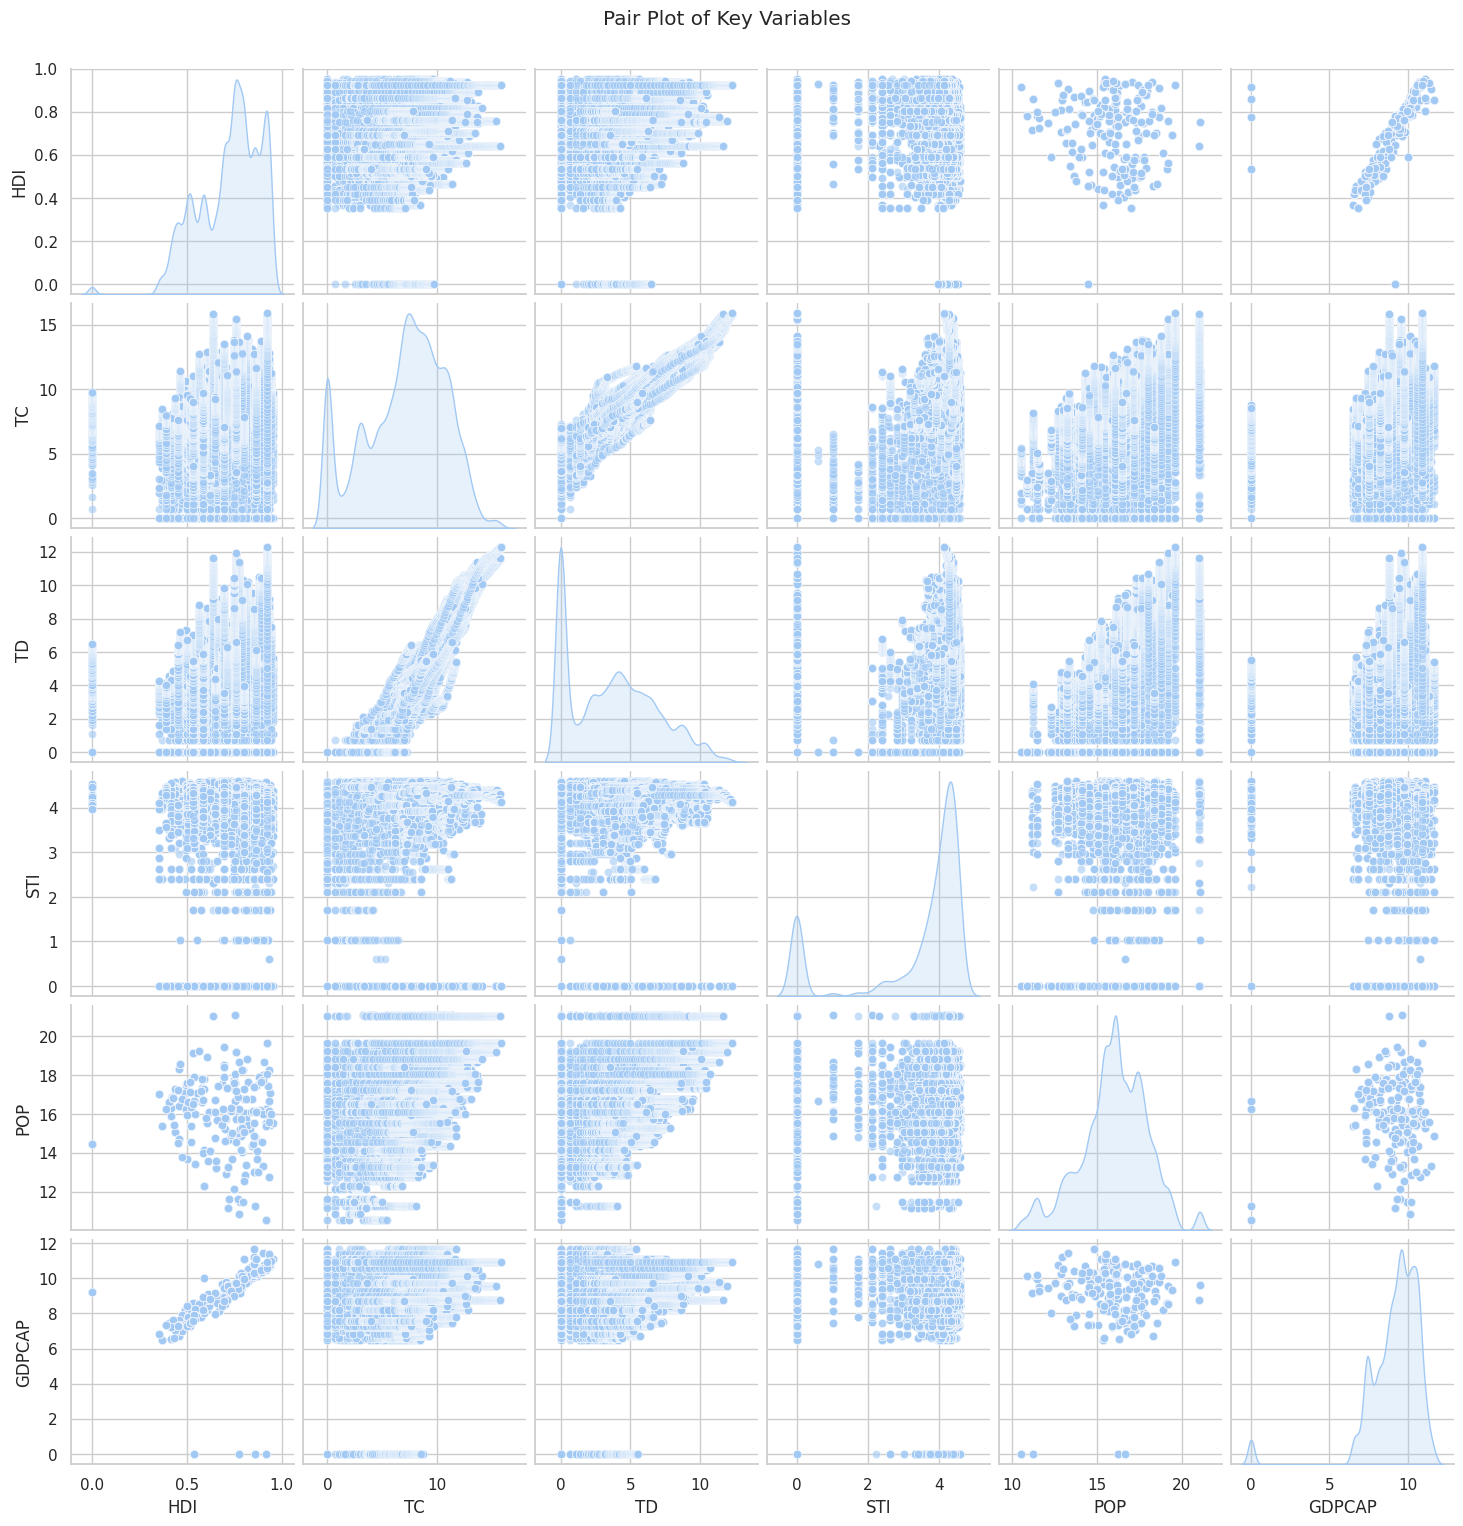

In [50]:
numerical_cols = ['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


- HDI vs Total Deaths: Countries with higher HDI tend to report more deaths, likely due to better tracking and larger populations. Higher development enables more accurate case reporting and healthcare infrastructure.

- Total Cases vs Total Deaths: There is a strong positive correlation, with higher infection rates leading to more deaths, especially in nations with less effective containment or healthcare systems.

- Total Cases vs Stringency Index: No clear correlation, suggesting stringent policies alone don't consistently reduce case numbers, likely due to factors like timing, enforcement, or healthcare capacity.

- Total Deaths vs Stringency Index: A dispersed pattern indicates that strict policies don't always result in fewer deaths, as healthcare capacity, demographics, and timing play roles.

- HDI vs Stringency Index: The relationship is ambiguous, showing that countries vary in their policy responses regardless of development levels.

**Higher HDI is associated with more reported deaths and cases, but the Stringency Index doesn't consistently correlate with reduced cases or deaths, suggesting a complex interaction of policy, healthcare, and demographics during the pandemic.**

**REGRESSION PLOT**

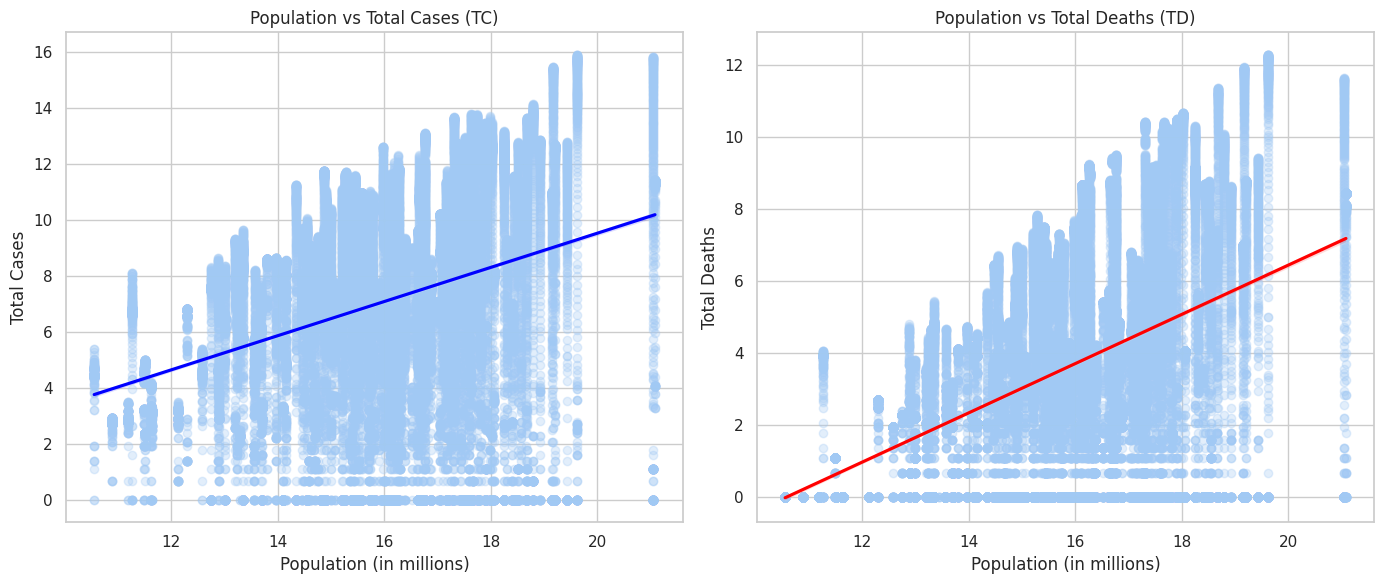

In [51]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='POP', y='TC', scatter_kws={'alpha': 0.3}, line_kws={'color': 'blue'})
plt.title("Population vs Total Cases (TC)")
plt.xlabel("Population (in millions)")
plt.ylabel("Total Cases")

# Population vs Total Deaths
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='POP', y='TD', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("Population vs Total Deaths (TD)")
plt.xlabel("Population (in millions)")
plt.ylabel("Total Deaths")

plt.tight_layout()
plt.show()

- Both graphs suggest that population size plays a significant role in the total cases and deaths from COVID-19, but other factors likely contribute to the spread and mortality rate.
- The consistent upward trends across both graphs imply that larger countries need more robust healthcare and containment measures to manage the pandemic effectively.

**FACET GRID**

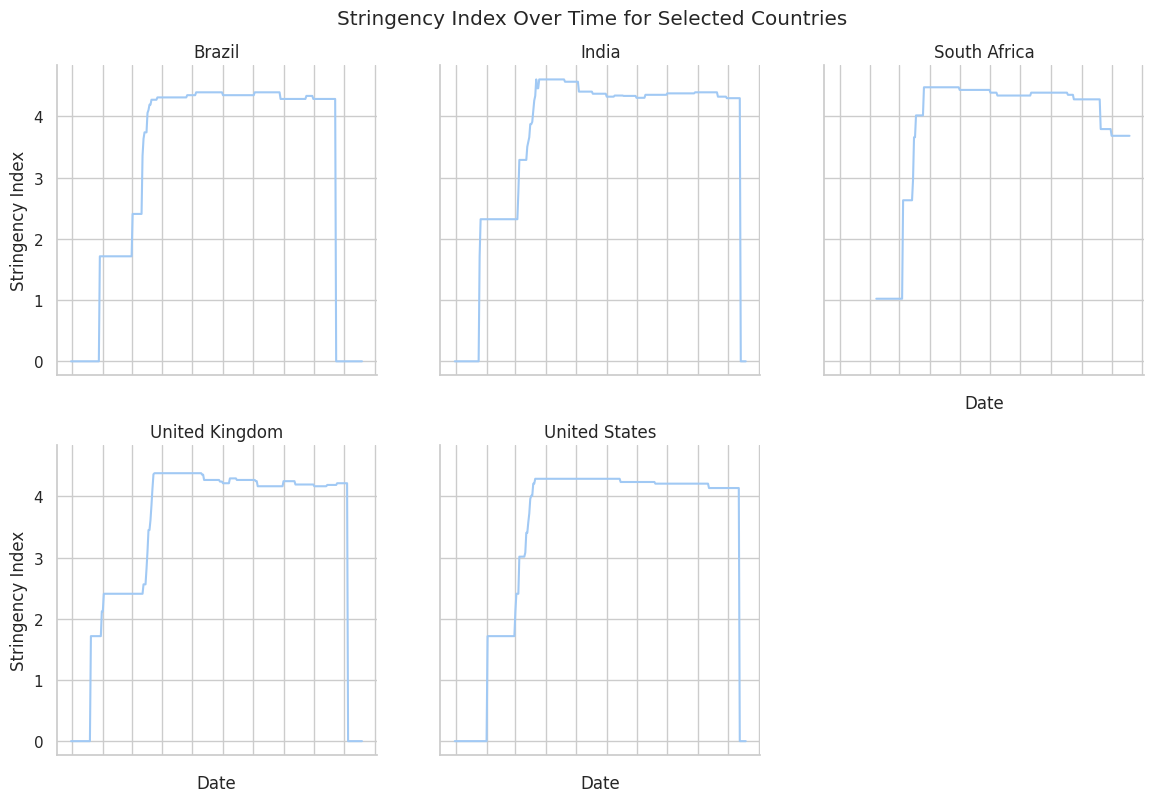

In [52]:
g = sns.FacetGrid(df[df['COUNTRY'].isin(countries)], col="COUNTRY", col_wrap=3, height=4)
g.map(sns.lineplot, 'DATE', 'STI')
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Stringency Index")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Stringency Index Over Time for Selected Countries", y=1.02)
plt.show()


- All countries initially imposed strict measures to control the pandemic, reflected in the sharp rise in the Stringency Index.
- While some countries, like India and the UK, maintained high stringency over a longer period, others (such as the US and South Africa) showed a more relaxed approach after the initial phase.
- The variations in the timing and duration of the strict measures indicate differing strategies to manage the pandemic, which may be influenced by factors such as infection rates, healthcare capacity, and economic considerations.

These visualizations allow for a comparative understanding of how different countries handled COVID-19 restrictions over time.

**VIOLIN PLOT**

<ipython-input-53-2c2a201cd52c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




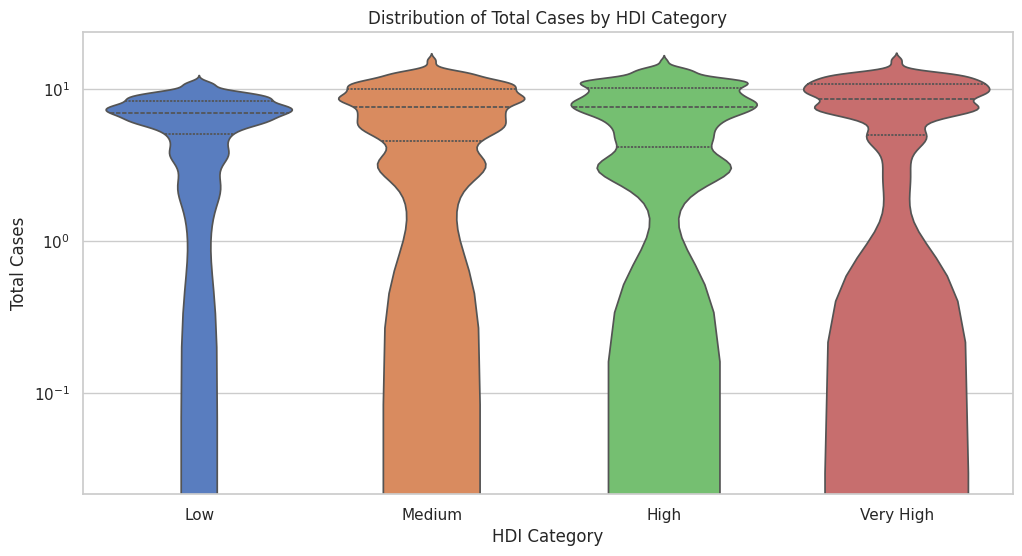

In [53]:
df['HDI_Category'] = pd.cut(df['HDI'], bins=[0, 0.55, 0.7, 0.85, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='HDI_Category', y='TC', palette="muted", inner="quartile")
plt.title("Distribution of Total Cases by HDI Category")
plt.xlabel("HDI Category")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.show()



- Countries in the *Low HDI category* generally had fewer total cases of COVID-19, possibly due to lower testing or less international connectivity.
- As HDI increases (Medium, High, Very High), the *distribution broadens*, indicating more variation in how COVID-19 impacted countries.
- The *Very High HDI countries* have the most varied case totals, likely influenced by factors such as urbanization, healthcare capacity, and international travel, resulting in both lower and higher extremes in total cases.

This graph helps to compare how COVID-19 case counts differ by levels of human development, with richer, more developed countries experiencing a wider range of total cases compared to those with lower HDI.

**SCATTER PLOT**

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:315: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:318: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning:

All-NaN slice encountered



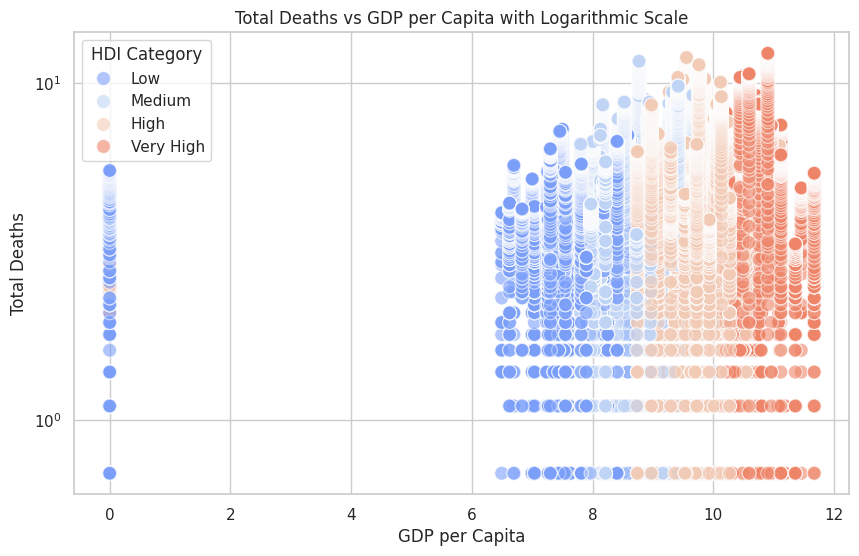

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDPCAP', y='TD', hue='HDI_Category', palette="coolwarm", edgecolor='w', s=100, alpha=0.6)
sns.regplot(data=df, x='GDPCAP', y='TD', scatter=False, color='black', logx=True)
plt.title("Total Deaths vs GDP per Capita with Logarithmic Scale")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.legend(title="HDI Category")
plt.show()

**Relationship Between Development and Total Deaths**: Countries with higher HDI tend to have both higher GDP per capita and higher total deaths. This could be due to a combination of larger populations, better reporting, or specific causes of death more prevalent in wealthier, more developed nations (e.g., aging populations).

**Logarithmic Scale Effect**: The use of a logarithmic scale highlights the differences across orders of magnitude in the total deaths between countries of different economic and developmental standings, suggesting that in some less developed countries, reported deaths may appear artificially low due to population or systemic factors.